In [1]:
!pip install pandasql 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import sqlite3 as sq3
import pandas.io.sql as pds
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import pandasql as ps

In [3]:
response = requests.get("https://api.covid19api.com/total/country/indonesia")
responseList = json.loads(response.text)
df = pd.DataFrame(responseList)
df

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,Indonesia,,,,,0,0,0,0,0,0,2020-01-22T00:00:00Z
1,Indonesia,,,,,0,0,0,0,0,0,2020-01-23T00:00:00Z
2,Indonesia,,,,,0,0,0,0,0,0,2020-01-24T00:00:00Z
3,Indonesia,,,,,0,0,0,0,0,0,2020-01-25T00:00:00Z
4,Indonesia,,,,,0,0,0,0,0,0,2020-01-26T00:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...
1077,Indonesia,,,,,0,0,6721095,160648,0,6560447,2023-01-03T00:00:00Z
1078,Indonesia,,,,,0,0,6721692,160657,0,6561035,2023-01-04T00:00:00Z
1079,Indonesia,,,,,0,0,6722227,160665,0,6561562,2023-01-05T00:00:00Z
1080,Indonesia,,,,,0,0,6722746,160673,0,6562073,2023-01-06T00:00:00Z


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082 entries, 0 to 1081
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Country      1082 non-null   object
 1   CountryCode  1082 non-null   object
 2   Province     1082 non-null   object
 3   City         1082 non-null   object
 4   CityCode     1082 non-null   object
 5   Lat          1082 non-null   object
 6   Lon          1082 non-null   object
 7   Confirmed    1082 non-null   int64 
 8   Deaths       1082 non-null   int64 
 9   Recovered    1082 non-null   int64 
 10  Active       1082 non-null   int64 
 11  Date         1082 non-null   object
dtypes: int64(4), object(8)
memory usage: 101.6+ KB


In [5]:
df["Date"] =  pd.to_datetime(df["Date"]).dt.date

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082 entries, 0 to 1081
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Country      1082 non-null   object
 1   CountryCode  1082 non-null   object
 2   Province     1082 non-null   object
 3   City         1082 non-null   object
 4   CityCode     1082 non-null   object
 5   Lat          1082 non-null   object
 6   Lon          1082 non-null   object
 7   Confirmed    1082 non-null   int64 
 8   Deaths       1082 non-null   int64 
 9   Recovered    1082 non-null   int64 
 10  Active       1082 non-null   int64 
 11  Date         1082 non-null   object
dtypes: int64(4), object(8)
memory usage: 101.6+ KB


In [7]:
output_df  = ps.sqldf("select Confirmed, Date from df where Date between '2021-12-15' and '2022-01-15'")
output_df

,Confirmed,Date
0,4259644,2021-12-15
1,4259857,2021-12-16
2,4260148,2021-12-17
3,4260380,2021-12-18
4,4260544,2021-12-19
5,4260677,2021-12-20
6,4260893,2021-12-21
7,4261072,2021-12-22
8,4261208,2021-12-23
9,4261412,2021-12-24


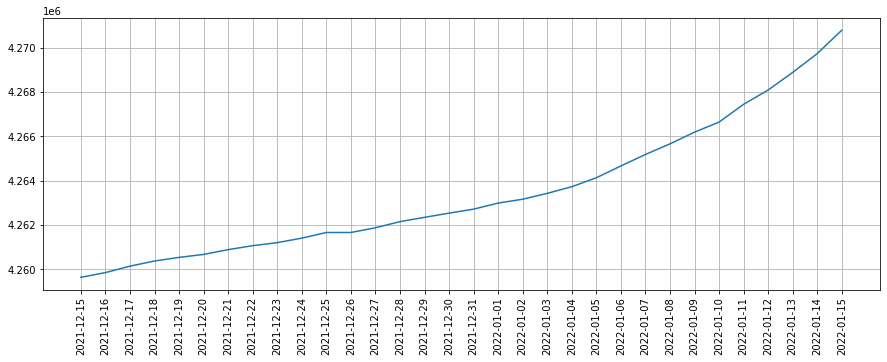

In [10]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)

plt.plot(output_df["Date"], output_df["Confirmed"])
plt.grid()
plt.tick_params(axis='x', rotation=90)
plt.show()